# Load the Data

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [98]:
def gd_path(file_id):
    """Generate a shareable link from Google Drive file id."""
    return f"https://drive.google.com/uc?export=download&id={file_id}"

files_id = {
    'songs':"1lU9fD0Q2vUQf6hJqri0WNvdwYlBFYxq7",
    'songs_5000':"1ANRezff5WhbAgQH1qo7csdUdHVMDjXe_",
    'songs_5000_clust':"13X1dPDPf_-8VOE6Lk-VBpXzVEFuQ7kA5"

}

songs = pd.read_csv(gd_path(files_id['songs']), sep=",")
songs_5000 = pd.read_csv(gd_path(files_id['songs_5000']), sep=",")
songs_5000_clust = pd.read_csv(gd_path(files_id['songs_5000_clust']), sep=",")

# 5000 Songs

In [4]:
songs_5000.sample(5)

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
4658,Weinst Du ...,Echt,0.386,0.490,5,-10.710,1,0.0318,0.483000,0.0000,0.4860,0.2170,129.645,,251733,4,2RjnnOuAvosOSAZhZQ50kO,https://open.spotify.com/track/2RjnnOuAvosOSAZ...
1477,Say What You Want ...,Texas,0.633,0.841,4,-5.932,1,0.0702,0.200000,0.0000,0.3960,0.8030,95.888,,233867,4,4MIB4aXVS0M0KNVcbQlyOP,https://open.spotify.com/track/4MIB4aXVS0M0KNV...
3992,Cast the First Stone ...,Master,0.237,0.908,1,-8.093,1,0.0966,0.000008,0.5300,0.0810,0.3150,173.274,,207933,4,1S3oerGUeditf1HlkFFlMf,https://open.spotify.com/track/1S3oerGUeditf1H...
1222,One of These Nights - 2013 Remaster ...,Eagles,0.655,0.606,7,-10.385,1,0.0285,0.060300,0.0789,0.0757,0.7650,110.061,,291686,4,608xszaAxVh4m7NcKJiAbF,https://open.spotify.com/track/608xszaAxVh4m7N...
4512,dlp 1.3 ...,William Basinski,0.161,0.101,5,-27.009,1,0.0465,0.953000,0.9670,0.0651,0.0396,69.226,,717720,3,0DsKfyDPVSfJPWb3Jno6WC,https://open.spotify.com/track/0DsKfyDPVSfJPWb...


## Drop Dimensions

Loudness

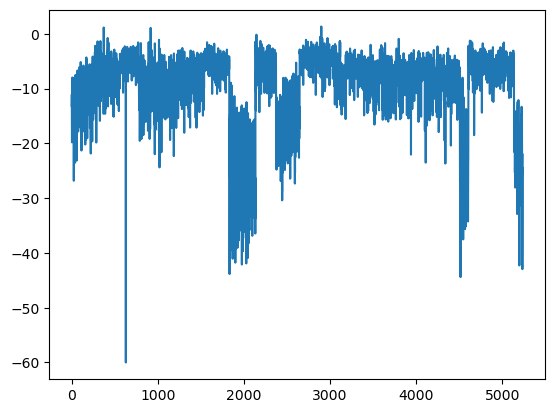

In [5]:
songs_5000.loudness.plot();

<Axes: >

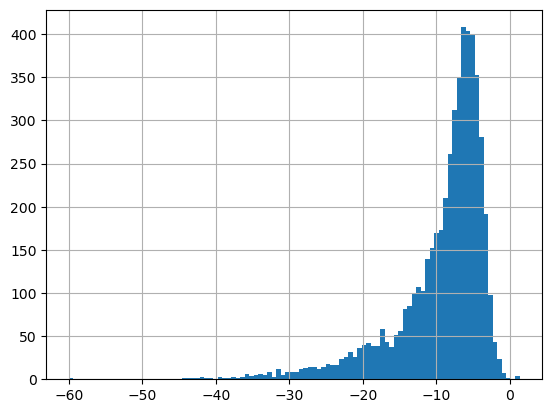

In [6]:
songs_5000.loudness.hist(bins=100)

I would not drop: duration_ms, key, liveness

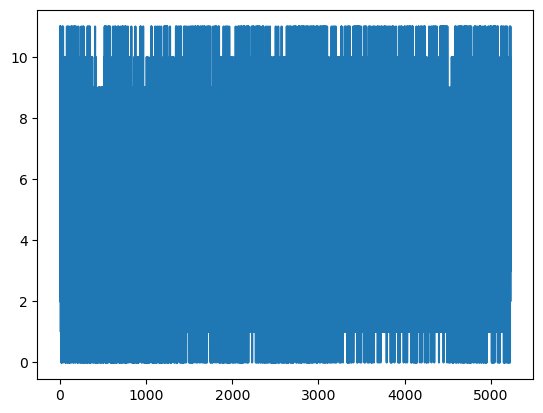

In [19]:
songs_5000.key.plot();

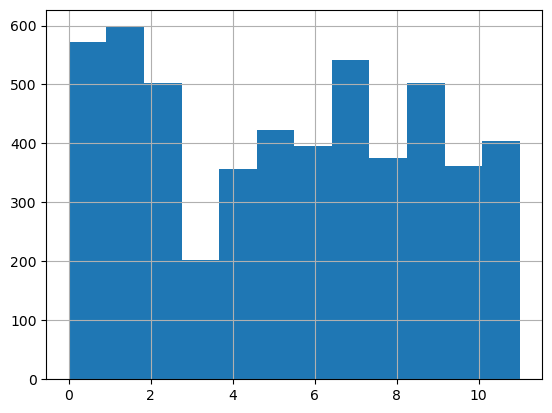

In [20]:
songs_5000.key.hist(bins=12);

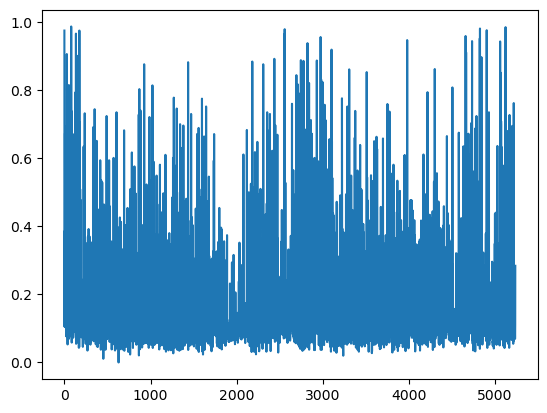

In [21]:
songs_5000.liveness.plot();

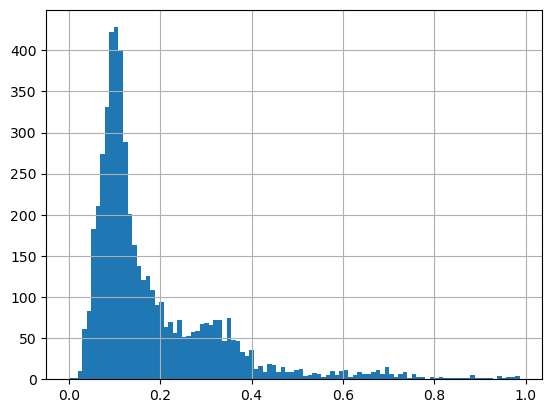

In [22]:
songs_5000.liveness.hist(bins=100);

Looks like chaos

In [23]:
songs_5000_num = songs_5000[['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature']]

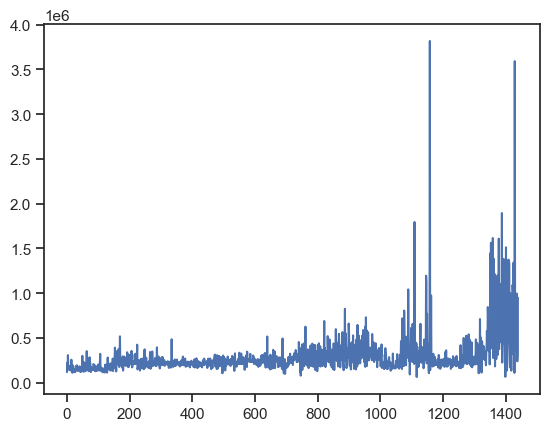

In [133]:
songs_5000.duration_ms.plot();

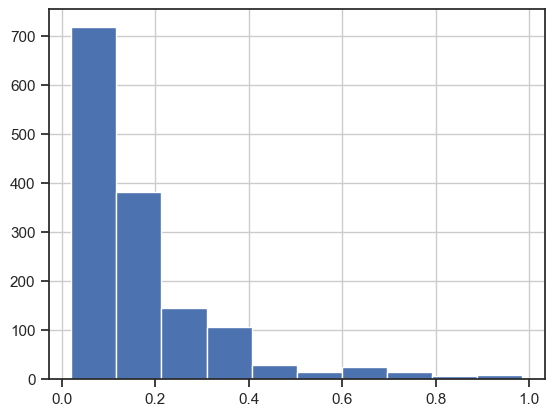

In [134]:
songs_5000.liveness.hist();

In [26]:
songs_5000

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,Mulher Eu Sei ...,Chico César,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,Rosa Morena ...,Kurt Elling,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,,995000,4,1aEhYlZtypmipA06SDJ4U3,https://open.spotify.com/track/1aEhYlZtypmipA0...
5231,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,,855000,4,1Gfqe7TAKklmuZf6hxsH6h,https://open.spotify.com/track/1Gfqe7TAKklmuZf...
5232,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,,238187,3,2XNwnFrdMDpismp0VUZ7cU,https://open.spotify.com/track/2XNwnFrdMDpismp...
5233,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",Antonín Dvořák,0.1330,0.02080,4,-29.443,1,0.0419,0.883,0.505000,0.1110,0.0591,67.109,,314307,4,7ucDwgMtE3YJtEfTbuRhy0,https://open.spotify.com/track/7ucDwgMtE3YJtEf...


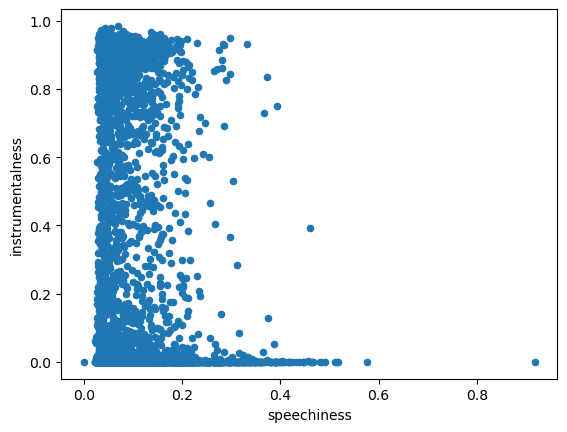

In [27]:
songs_5000.plot.scatter('speechiness','instrumentalness');

In [28]:
songs_5000_num = songs_5000[['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature']]

Remove columns: 2:key; 8:liveness; 11:durations_ms

## Visualsation of All numerical data

raw:

In [29]:
songs_5000_num.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5.235000e+03,5235.000000
mean,0.509503,0.653565,5.254441,-9.338098,0.646227,0.083178,0.290043,0.257337,0.185354,0.443596,118.721407,2.479112e+05,3.902961
std,0.218041,0.288335,3.571559,6.294850,0.478185,0.071193,0.355985,0.370686,0.149410,0.277725,28.568463,1.356330e+05,0.420324
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.276000e+04,0.000000
25%,0.309000,0.479000,2.000000,-11.337000,0.000000,0.039000,0.002450,0.000001,0.092500,0.196000,96.174000,1.899910e+05,4.000000
50%,0.539000,0.738000,5.000000,-7.338000,1.000000,0.055800,0.095400,0.001880,0.125000,0.417000,119.180000,2.246670e+05,4.000000
75%,0.688000,0.893000,8.000000,-5.264000,1.000000,0.098650,0.565500,0.643000,0.237000,0.677000,134.019000,2.717200e+05,4.000000
max,0.967000,1.000000,11.000000,1.342000,1.000000,0.918000,0.996000,0.985000,0.987000,0.985000,213.990000,3.815787e+06,5.000000


In [37]:
sns.set_theme(style="ticks")
sns.pairplot(data=songs_5000_num, hue="danceability")
plt.show()

## With scaling:

###1. Standard scaler (z scaler)

In [ ]:
#from sklearn.preprocessing import StandardScaler
#song_5000_norm = StandardScaler().fit_transform(songs_5000_num)
#song_5000_norm_df = pd.DataFrame(song_5000_norm)
#song_5000_norm_df.describe()

In [ ]:
#sns.set_theme(style="ticks")
#sns.pairplot(data=song_5000_norm_df, hue=1)
#plt.show()

###2. Minmax scaler

In [32]:
from sklearn.preprocessing import MinMaxScaler
song_5000_norm = MinMaxScaler().fit_transform(songs_5000_num)
song_5000_norm_mm_df = pd.DataFrame(song_5000_norm)
song_5000_norm_mm_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000
mean,0.526890,0.653565,0.477676,0.825893,0.646227,0.090608,0.291208,0.261255,0.187795,0.450352,0.554799,0.056873,0.780592
std,0.225482,0.288335,0.324687,0.102619,0.478185,0.077552,0.357414,0.376331,0.151378,0.281954,0.133504,0.035853,0.084065
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.319545,0.479000,0.181818,0.793306,0.000000,0.042484,0.002460,0.000001,0.093718,0.198985,0.449432,0.041562,0.800000
50%,0.557394,0.738000,0.454545,0.858498,1.000000,0.060784,0.095783,0.001909,0.126646,0.423350,0.556942,0.050728,0.800000
75%,0.711479,0.893000,0.727273,0.892309,1.000000,0.107462,0.567771,0.652792,0.240122,0.687310,0.626286,0.063166,0.800000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#sns.set_theme(style="ticks")
#sns.pairplot(data=song_5000_norm_mm_df, hue=1)
#plt.show()

###3. Robust scaler

In [ ]:
#from sklearn.preprocessing import RobustScaler
#song_5000_norm = RobustScaler().fit_transform(songs_5000_num)
#song_5000_norm_df = pd.DataFrame(song_5000_norm)
#song_5000_norm_df.describe()

In [ ]:
#sns.set_theme(style="ticks")
#sns.pairplot(data=song_5000_norm_df, hue=1)
#plt.show()

Let's kee the `Minmax scaler` becuase it keeps the (0-1) range.


## Clustering all sound

How many clusters do we choose?

In [52]:
song_5000_norm_mm_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.680455,0.25900,1.000000,0.763897,0.0,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800,0.059067,0.8
1,0.767322,0.39900,0.181818,0.771967,1.0,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322,0.042058,0.8
2,0.880041,0.73000,0.181818,0.798018,1.0,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862,0.031590,0.8
3,0.729059,0.05020,0.363636,0.682811,1.0,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098,0.040567,0.8
4,0.673216,0.11900,0.545455,0.655228,1.0,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171,0.063684,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,0.208893,0.06940,0.272727,0.596818,1.0,0.051525,0.920683,0.725888,0.084296,0.066497,0.410795,0.254357,0.8
5231,0.194416,0.10100,0.545455,0.621548,1.0,0.048148,0.858434,0.432487,0.070314,0.036041,0.388495,0.217350,0.8
5232,0.061634,0.00093,0.818182,0.277803,1.0,0.047277,0.954819,0.983756,0.078217,0.034924,0.334469,0.054302,0.6
5233,0.137539,0.02080,0.363636,0.498142,1.0,0.045643,0.886546,0.512690,0.112462,0.060000,0.313608,0.074424,0.8


### Inertia and the Elbow Method

In [63]:
list_k = []
seed = 0
for i in range(20,50):
    my_kmeans = KMeans(n_clusters=i, random_state=seed, n_init=10)
    my_kmeans.fit(song_5000_norm_mm_df)
    list_k.append(my_kmeans.inertia_)

f_k_mean=pd.DataFrame(list_k)

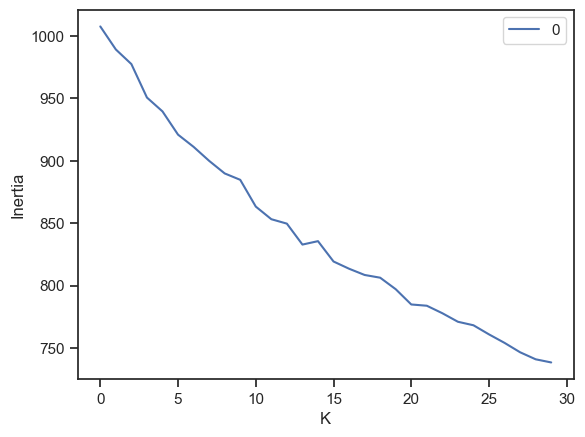

In [64]:
df_k_mean.plot();
plt.annotate('Elbow', xy=(20, 600), xytext=(20, 500000), arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel("K")
plt.ylabel("Inertia");

/Users/Smirnov/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/Smirnov/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/Smirnov/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/Smirnov/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/Smirnov/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_k

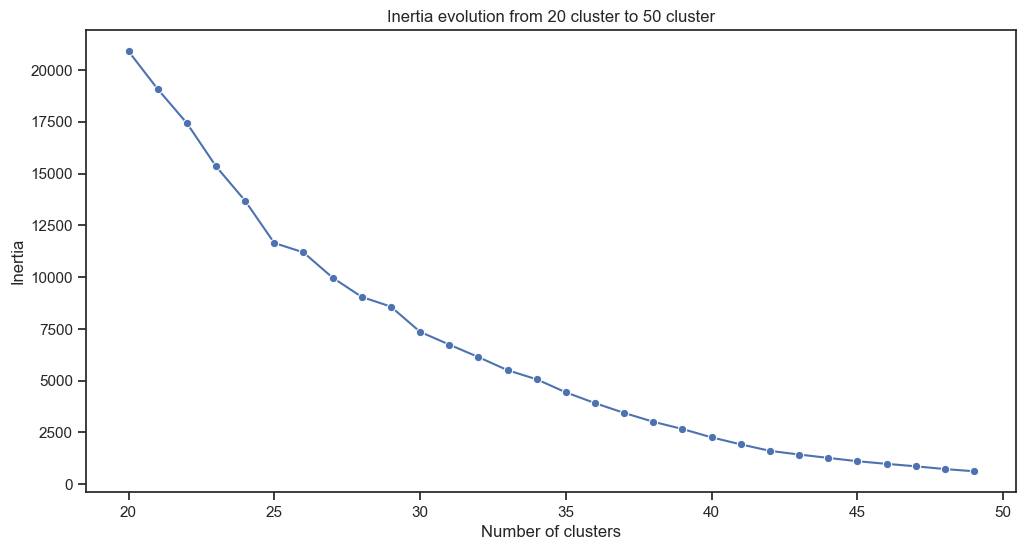

In [94]:
max_k = 50
inertia = []

for k in range(20, max_k):
    inertia.append(KMeans(n_clusters=k).fit(song_5000_norm_mm_df).inertia_)

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from 20 cluster to {max_k} cluster')
sns.lineplot(x=range(20, max_k), y=inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### The silhouette coefficient

In [56]:
from sklearn.metrics import silhouette_score
#silhouette_score(song_5000_norm_mm_df, song_two_norm_df.cluster)

The silhouette coefficient can vary between -1 and +1:

|   |   |
|---|---|
|+1   | the instance is well inside its own cluster and far from other clusters.  |
|0   | the instance is close to a cluster boundary.   |
|-1   | the instance may have been assigned to the wrong cluster.  |

In [65]:
song_5000_norm_mm_df.columns = song_5000_norm_mm_df.columns.astype(str)

sil_scores = []
for i in range(20,50):
    my_kmeans = KMeans(n_clusters=i, random_state=seed, n_init=10)
    my_kmeans.fit(song_5000_norm_mm_df)
    song_5000_norm_mm_df['cluster'] = my_kmeans.labels_
    sil_scores.append(silhouette_score(song_5000_norm_mm_df, song_5000_norm_mm_df.cluster))

df_sc_mean=pd.DataFrame(sil_scores)

/Users/Smirnov/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/Smirnov/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/Smirnov/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/Smirnov/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/Smirnov/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_k

/Users/Smirnov/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/Smirnov/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/Smirnov/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/Smirnov/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/Smirnov/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_k

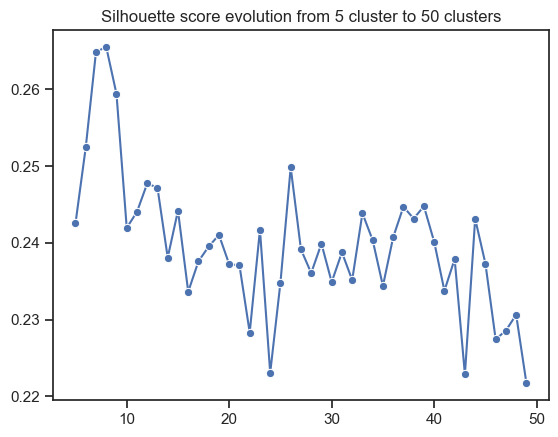

In [66]:
max_k = 50
sil_score = []

food_norm = MinMaxScaler().fit_transform(song_5000_norm_mm_df)

for k in range(5, max_k):
    labels = KMeans(n_clusters=k).fit(food_norm).labels_
    sil_score.append(silhouette_score(food_norm, labels))

plt.title(f'Silhouette score evolution from 5 cluster to {max_k} clusters')
sns.lineplot(x=range(5, max_k), y=sil_score, marker='o')
plt.show()

## Clustering

In [67]:
from sklearn.cluster import KMeans


my_kmeans = KMeans(n_clusters= 20)

my_kmeans.fit(song_5000_norm_mm_df) # pass your scaled data here

# 4. obtain the cluster output
clusters = my_kmeans.predict(song_5000_norm_mm_df) # pass your scaled data here

# 5. attach the cluster output to our original DataFrame
song_5000_norm_mm_df['cluster'] = clusters

/Users/Smirnov/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [68]:
song_5000_norm_mm_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,cluster
0,0.680455,0.25900,1.000000,0.763897,0.0,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800,0.059067,0.8,14
1,0.767322,0.39900,0.181818,0.771967,1.0,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322,0.042058,0.8,1
2,0.880041,0.73000,0.181818,0.798018,1.0,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862,0.031590,0.8,7
3,0.729059,0.05020,0.363636,0.682811,1.0,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098,0.040567,0.8,2
4,0.673216,0.11900,0.545455,0.655228,1.0,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171,0.063684,0.8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,0.208893,0.06940,0.272727,0.596818,1.0,0.051525,0.920683,0.725888,0.084296,0.066497,0.410795,0.254357,0.8,2
5231,0.194416,0.10100,0.545455,0.621548,1.0,0.048148,0.858434,0.432487,0.070314,0.036041,0.388495,0.217350,0.8,11
5232,0.061634,0.00093,0.818182,0.277803,1.0,0.047277,0.954819,0.983756,0.078217,0.034924,0.334469,0.054302,0.6,16
5233,0.137539,0.02080,0.363636,0.498142,1.0,0.045643,0.886546,0.512690,0.112462,0.060000,0.313608,0.074424,0.8,2


## t-SNE

#### With 20 clusters

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import seaborn as sns

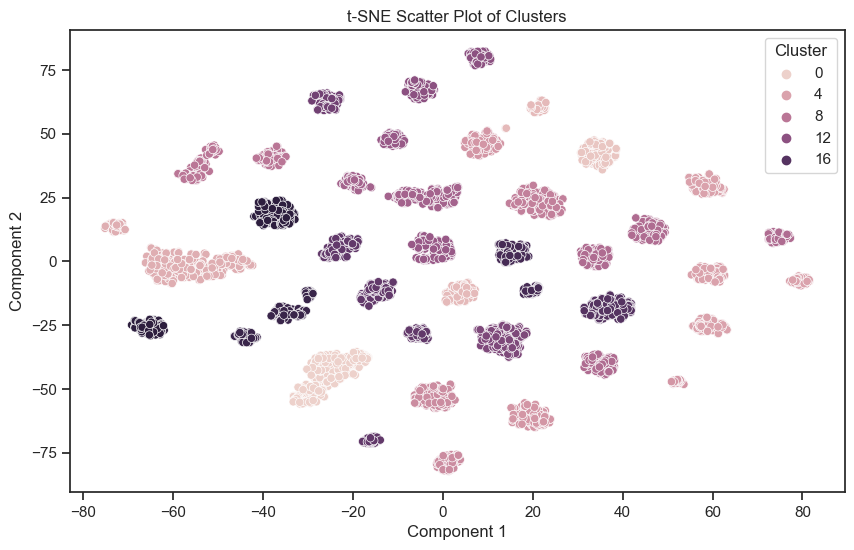

In [69]:
km = KMeans(n_clusters=20,random_state=seed, n_init=10)
km.fit(song_5000_norm_mm_df)

#Add the cluster labels to the original dataframe
song_5000_norm_mm_df['Cluster'] = km.labels_

#Perform t-SNE to reduce dimensionality to 2 components
tsne = TSNE(n_components=2, random_state=0)
tsne_components = tsne.fit_transform(song_5000_norm_mm_df.drop('Cluster', axis=1))

#Create a new DataFrame with the t-SNE components
tsne_df = pd.DataFrame(data=tsne_components, columns=['Component 1', 'Component 2'])

#Add the cluster labels to the t-SNE dataframe
tsne_df['Cluster'] = km.labels_

#Define a custom color palette for each cluster
#custom_palette = sns.color_palette("Set1", n_colors=km.n_clusters)

#Create a scatter plot of the t-SNE components with custom colors
sns.set(style="ticks")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='Component 1', y='Component 2', hue='Cluster', markers=["o", "s", "D", "P"])
plt.title('t-SNE Scatter Plot of Clusters')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Cluster')
plt.show()

In [71]:
songs_5000.iloc[1439]

name                Circle of Life - From "The Lion King"/Soundtra...
artist               Elton John                                      
danceability                                                      0.3
energy                                                          0.387
key                                                                10
loudness                                                      -15.321
mode                                                                1
speechiness                                                    0.0331
acousticness                                                    0.264
instrumentalness                                                0.215
liveness                                                        0.106
valence                                                         0.137
tempo                                                         160.587
type                                                                 
duration_ms         

In [72]:
songs_5000.index

RangeIndex(start=0, stop=5235, step=1)

In [73]:
songs_cluster = pd.merge(songs_5000.reset_index(), song_5000_norm_mm_df.reset_index(), on='index').sort_values(by="Cluster")

In [74]:
songs_cluster.columns

Index(['index', 'name', 'artist', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'duration_ms', 'time_signature', 'id',
       'html', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', 'cluster', 'Cluster'],
      dtype='object')

In [75]:
songs_cluster[['name','artist','Cluster']][songs_cluster.Cluster == 2].sample(10)

,name,artist,Cluster
1728,"Flashlight - From ""Pitch Perfect 2"" Soundtrack...",Jessie J,2
674,In My Mind ...,Dynoro,2
2407,"Aida / Act 1: ""Celeste Aida"" ...",Giuseppe Verdi,2
4408,Until Death Joins Us Again ...,God Forsaken,2
4858,Augenbling ...,Seeed,2
2571,My Favorite Things ...,John Coltrane,2
1050,What A Wonderful World ...,Louis Armstrong,2
2839,You Make Me ...,Avicii,2
2877,Oh My - Club Mix ...,The Partysquad,2
5110,Happy - Live/Remastered ...,Tasha Cobbs Leonard,2


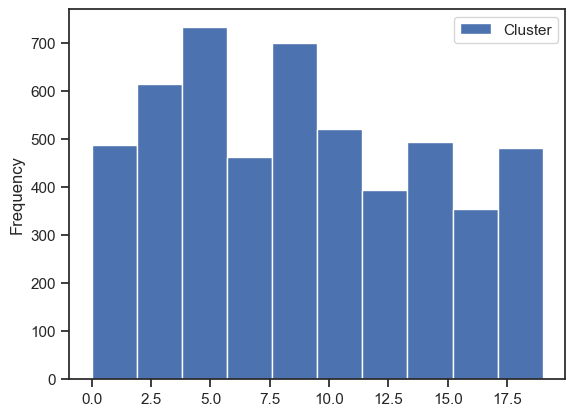

In [76]:
songs_cluster[['Cluster']].plot.hist();

#### With 50 clusters

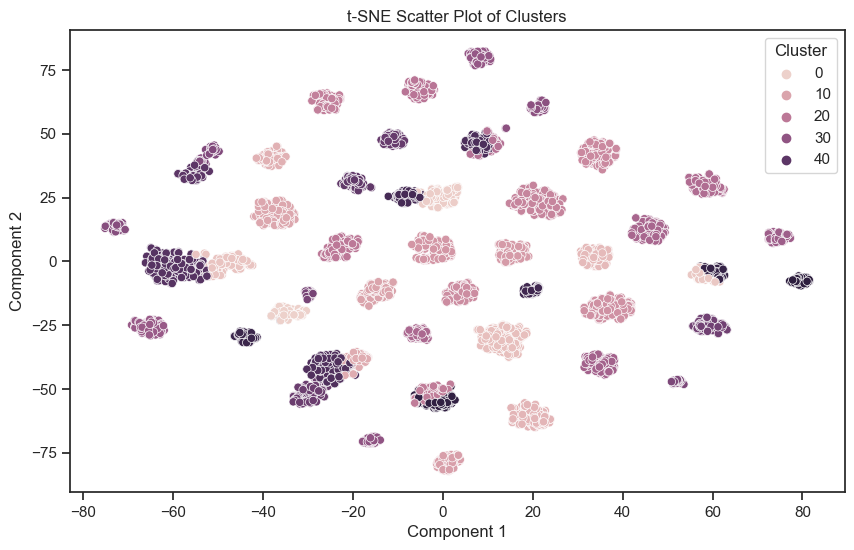

In [77]:
km = KMeans(n_clusters=50,random_state=seed, n_init=10)
km.fit(song_5000_norm_mm_df)

#Add the cluster labels to the original dataframe
song_5000_norm_mm_df['Cluster'] = km.labels_

#Perform t-SNE to reduce dimensionality to 2 components
tsne = TSNE(n_components=2, random_state=0)
tsne_components = tsne.fit_transform(song_5000_norm_mm_df.drop('Cluster', axis=1))

#Create a new DataFrame with the t-SNE components
tsne_df = pd.DataFrame(data=tsne_components, columns=['Component 1', 'Component 2'])

#Add the cluster labels to the t-SNE dataframe
tsne_df['Cluster'] = km.labels_

#Define a custom color palette for each cluster
#custom_palette = sns.color_palette("Set1", n_colors=km.n_clusters)

#Create a scatter plot of the t-SNE components with custom colors
sns.set(style="ticks")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='Component 1', y='Component 2', hue='Cluster', markers=["o", "s", "D", "P"])
plt.title('t-SNE Scatter Plot of Clusters')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Cluster')
plt.show()

In [78]:
songs_5000.index

RangeIndex(start=0, stop=5235, step=1)

In [79]:
songs_cluster = pd.merge(songs_5000.reset_index(), song_5000_norm_mm_df.reset_index(), on='index').sort_values(by="Cluster")

In [80]:
songs_cluster.columns

Index(['index', 'name', 'artist', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'duration_ms', 'time_signature', 'id',
       'html', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', 'cluster', 'Cluster'],
      dtype='object')

In [81]:
songs_cluster[['name','artist','Cluster']][songs_cluster.Cluster == 2].sample(10)

,name,artist,Cluster
4835,Nur in meinem Kopf - Radio Edit ...,Andreas Bourani,2
3541,The End Complete ...,Obituary,2
464,Oblivious ...,Galaxie 500,2
1006,Summer in the City - Remastered ...,The Lovin' Spoonful,2
267,Game Of Pricks ...,Guided By Voices,2
3553,Murder ...,Sepultura,2
5125,Worth Fighting For - Live ...,Brian Courtney Wilson,2
266,The Luckiest Guy On The Lower East Side ...,The Magnetic Fields,2
5113,God's Gonna Do It - Live ...,Ricky Dillard,2
3439,Dead Embryonic Cells ...,Sepultura,2


Bad Clustering aufter listening to music

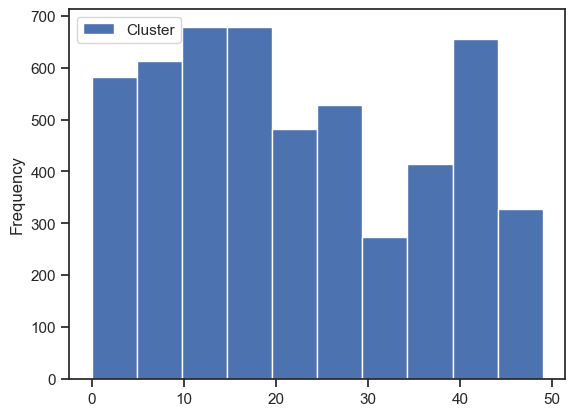

In [82]:
songs_cluster[['Cluster']].plot.hist();

## Remove dimension 

#### With 50 clusters

In [83]:
song_5000_norm_mm_df_short = song_5000_norm_mm_df.drop(columns=['2','8','11'])

In [84]:
song_5000_norm_mm_df_short

,0,1,3,4,5,6,7,9,10,12,cluster,Cluster
0,0.680455,0.25900,0.763897,0.0,0.076797,0.696787,0.000060,0.310660,0.515800,0.8,14,34
1,0.767322,0.39900,0.771967,1.0,0.037691,0.217871,0.000002,0.703553,0.584322,0.8,1,41
2,0.880041,0.73000,0.798018,1.0,0.377996,0.454819,0.000064,0.918782,0.437862,0.8,7,1
3,0.729059,0.05020,0.682811,1.0,0.051307,0.882530,0.000041,0.531980,0.499098,0.8,2,40
4,0.673216,0.11900,0.655228,1.0,0.041394,0.919679,0.000348,0.408122,0.565171,0.8,2,40
...,...,...,...,...,...,...,...,...,...,...,...,...
5230,0.208893,0.06940,0.596818,1.0,0.051525,0.920683,0.725888,0.066497,0.410795,0.8,2,7
5231,0.194416,0.10100,0.621548,1.0,0.048148,0.858434,0.432487,0.036041,0.388495,0.8,11,31
5232,0.061634,0.00093,0.277803,1.0,0.047277,0.954819,0.983756,0.034924,0.334469,0.6,16,16
5233,0.137539,0.02080,0.498142,1.0,0.045643,0.886546,0.512690,0.060000,0.313608,0.8,2,7


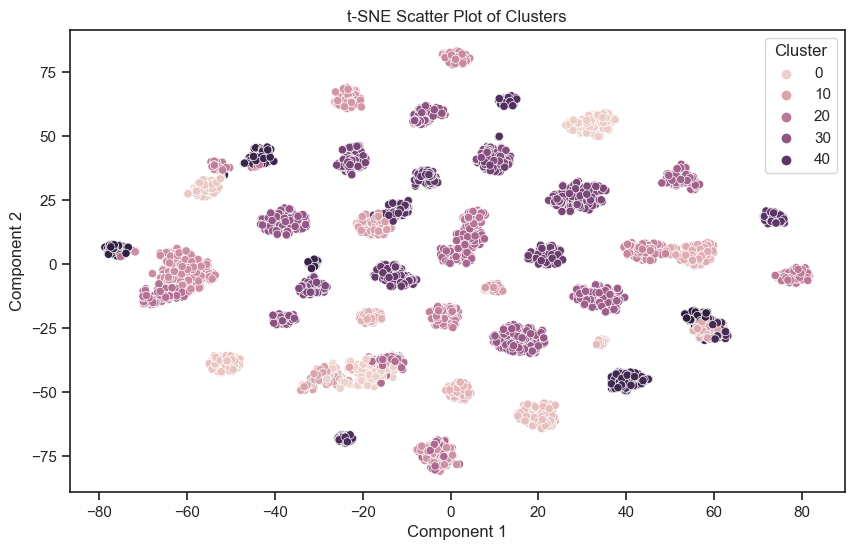

In [85]:
song_5000_norm_mm_df = song_5000_norm_mm_df_short 

km = KMeans(n_clusters=50,random_state=seed, n_init=10)
km.fit(song_5000_norm_mm_df)

#Add the cluster labels to the original dataframe
song_5000_norm_mm_df['Cluster'] = km.labels_

#Perform t-SNE to reduce dimensionality to 2 components
tsne = TSNE(n_components=2, random_state=0)
tsne_components = tsne.fit_transform(song_5000_norm_mm_df.drop('Cluster', axis=1))

#Create a new DataFrame with the t-SNE components
tsne_df = pd.DataFrame(data=tsne_components, columns=['Component 1', 'Component 2'])

#Add the cluster labels to the t-SNE dataframe
tsne_df['Cluster'] = km.labels_

#Define a custom color palette for each cluster
#custom_palette = sns.color_palette("Set1", n_colors=km.n_clusters)

#Create a scatter plot of the t-SNE components with custom colors
sns.set(style="ticks")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='Component 1', y='Component 2', hue='Cluster', markers=["o", "s", "D", "P"])
plt.title('t-SNE Scatter Plot of Clusters')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Cluster')
plt.show()

In [86]:
song_5000_norm_mm_df

,0,1,3,4,5,6,7,9,10,12,cluster,Cluster
0,0.680455,0.25900,0.763897,0.0,0.076797,0.696787,0.000060,0.310660,0.515800,0.8,14,5
1,0.767322,0.39900,0.771967,1.0,0.037691,0.217871,0.000002,0.703553,0.584322,0.8,1,15
2,0.880041,0.73000,0.798018,1.0,0.377996,0.454819,0.000064,0.918782,0.437862,0.8,7,11
3,0.729059,0.05020,0.682811,1.0,0.051307,0.882530,0.000041,0.531980,0.499098,0.8,2,46
4,0.673216,0.11900,0.655228,1.0,0.041394,0.919679,0.000348,0.408122,0.565171,0.8,2,46
...,...,...,...,...,...,...,...,...,...,...,...,...
5230,0.208893,0.06940,0.596818,1.0,0.051525,0.920683,0.725888,0.066497,0.410795,0.8,2,2
5231,0.194416,0.10100,0.621548,1.0,0.048148,0.858434,0.432487,0.036041,0.388495,0.8,11,42
5232,0.061634,0.00093,0.277803,1.0,0.047277,0.954819,0.983756,0.034924,0.334469,0.6,16,1
5233,0.137539,0.02080,0.498142,1.0,0.045643,0.886546,0.512690,0.060000,0.313608,0.8,2,2


In [87]:
songs_5000.index

RangeIndex(start=0, stop=5235, step=1)

In [88]:
songs_cluster = pd.merge(songs_5000.reset_index(), song_5000_norm_mm_df.reset_index(), on='index').sort_values(by="Cluster")

In [89]:
songs_cluster.columns

Index(['index', 'name', 'artist', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'duration_ms', 'time_signature', 'id',
       'html', '0', '1', '3', '4', '5', '6', '7', '9', '10', '12', 'cluster',
       'Cluster'],
      dtype='object')

In [97]:
songs_cluster[['name','artist','Cluster']][songs_cluster.Cluster == 3].sample(20)

,name,artist,Cluster
1549,Oops!...I Did It Again ...,Britney Spears,3
2366,Ritual ...,Ghost,3
3378,Eso Ehh..!!! ...,Alexis y Fido,3
1030,A World Without Love ...,Peter And Gordon,3
689,Wild Thoughts (feat. Rihanna & Bryson Tiller) ...,DJ Khaled,3
3041,Paradise - Tiësto Remix ...,Coldplay,3
1321,Fame ...,Irene Cara,3
2688,Alors on danse ...,Stromae,3
5103,If He Did It Before....Same God - Live ...,Tye Tribbett,3
1229,Beast Of Burden - Remastered 1994 ...,The Rolling Stones,3


Bad Clustering aufter listening to music

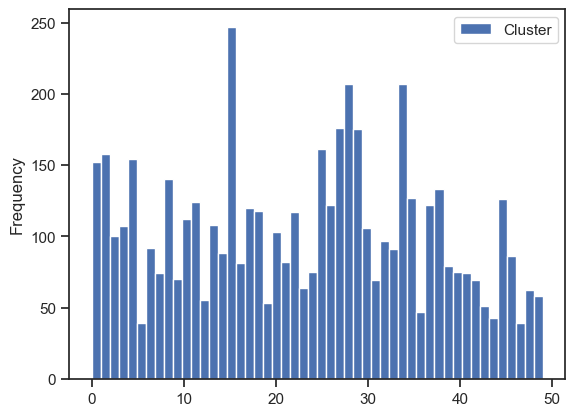

In [92]:
songs_cluster[['Cluster']].plot.hist(bins=50);